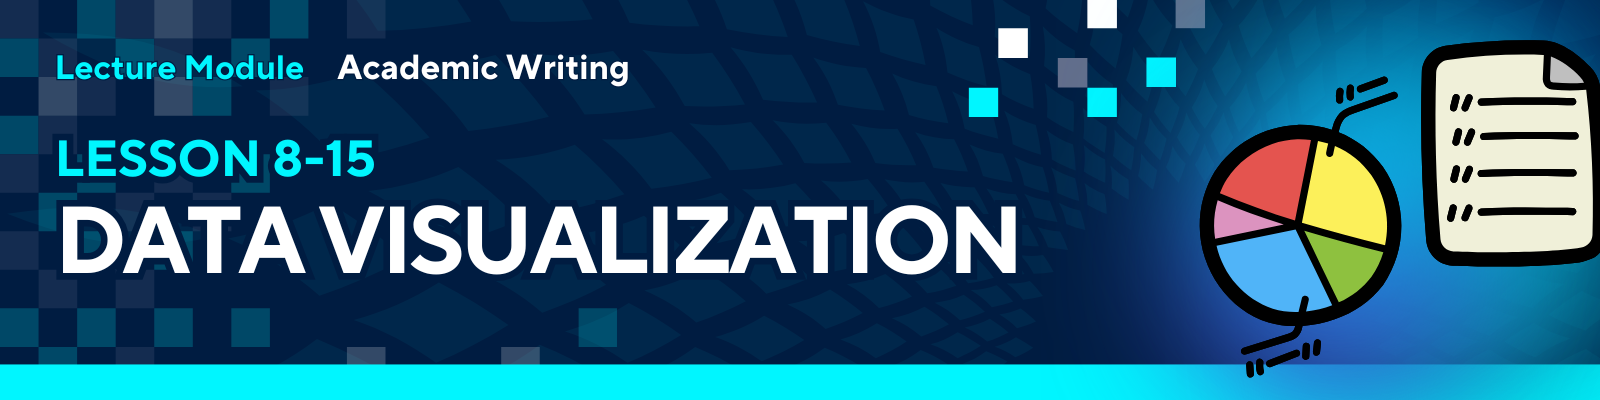

<img src="https://i.imgur.com/ccvH2Ia.png" width=1024 /><br><br>

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "../life_expectancy.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"

In [3]:
# DATASET FOR THE WHOLE WORKBOOK
# Define regions and their colors
regions = {"North Africa": ["Tunisia", "Morocco", "Egypt, Arab Rep.", "Libya", "Algeria"],
           "West Africa": ["Guinea-Bissau", "Cabo Verde", "Senegal", "Cameroon", "Nigeria", "Gambia, The", "Sierra Leone", "Liberia", "Ghana", "Mali", "Niger", "Chad", "Benin", "Togo", "Burkina Faso", "Cote d'Ivoire", "Guinea", "Mauritania", "Mauritius", "Comoros"],
           "East Africa": ["Ethiopia", "Somalia", "Tanzania", "Burundi", "Rwanda", "Kenya", "Eritrea", "Djibouti", "Uganda"],
           "Southern Africa": ["Namibia", "Mozambique", "Madagascar", "Zambia", "Malawi", "South Africa", "Lesotho", "Zimbabwe", "Eswatini", "Botswana", "Seychelles", "Equatorial Guinea", "Congo, Rep.", "Angola", "Congo, Dem. Rep.", "Gabon", "Central African Republic"]}

region_color = {
   'North Africa': 'darkgoldenrod',
   'West Africa': 'mediumseagreen',
   'East Africa': 'forestgreen',
   'Southern Africa': 'yellowgreen',
   'Middle East': 'darkorange'
}

# Create country-to-region mapping and assign regions
country_to_region = {country: region for region, countries in regions.items() for country in countries}
life_expectancy['Region_Africa'] = life_expectancy['Country'].map(country_to_region).fillna(
   life_expectancy['Region'].map({'Middle East': 'Middle East'})
)

# Filter data for 2010 Africa and Middle East
life_exp_adult_mort_AF = life_expectancy[
   (life_expectancy['Year'] == 2010) &
   (life_expectancy['Region'].isin(['Africa', 'Middle East']))
][['Country', 'Region_Africa', 'Life_expectancy', 'Adult_mortality']]

life_exp_adult_mort_AF

,Country,Region_Africa,Life_expectancy,Adult_mortality
86,Guinea-Bissau,West Africa,54.6,287.6200
89,Namibia,Southern Africa,56.7,412.4735
151,United Arab Emirates,Middle East,76.3,74.2960
230,Tunisia,North Africa,75.0,98.3545
369,"Yemen, Rep.",Middle East,65.5,235.0695
...,...,...,...,...
2801,Zimbabwe,Southern Africa,50.6,509.0880
2805,Togo,West Africa,57.5,300.3970
2813,"Congo, Dem. Rep.",Southern Africa,56.9,282.5420
2835,Gabon,Southern Africa,61.4,276.4095




---



# **Lesson** <font color="#B0AD89"><strong>7 ⫶⫶ </strong></font>Principles of Visual Design: Data-ink Ratio


## <font color="#B0AD89"><strong>7.0 ⫶ </strong></font> Anatomy of a Plot

<img src="https://i.imgur.com/krypnHW.png" width=1024 /><br><br>


<img src="https://i.imgur.com/ZqqZ2JQ.png" width=1024 />



In [ ]:
# Setup
selected_countries = ["Namibia", "Israel", "Tunisia", "Somalia", "Lesotho",
                    "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]  # Countries to label
fig, ax = plt.subplots(figsize=(6, 6))  # Create base plot

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=80, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)  # Main scatter by region
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1},
           ax=ax)  # Add trend line

# Data Labels
for country in selected_countries:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))  # Add country name labels

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.97,
            fontsize=13, fontweight='bold')  # Main title
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=10)  # Subtitle
fig.text(0.1, -0.03, "The two variables are highly correlated, especially in\n" +
        "North African and Middle Eastern countries.", ha='left')  # Caption
fig.text(0.02, 0.98, "a.", fontsize=12)  # Panel label

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")  # Set axis labels and limits
ax.legend(title="Region")  # Add legend
sns.despine(left=False, bottom=False)  # Remove top/right spines
ax.grid(True, alpha=0.3, zorder=1)  # Add light grid

plt.show()

<img src="https://i.imgur.com/A5cftMx.png" width=1024 /><br><br>

<img src="https://i.imgur.com/f5PFJ2E.png" width=1024 /><br><br>

<img src="https://i.imgur.com/qj53KXg.png" width=1024 /><br><br>

<img src="https://i.imgur.com/OfmHl5v.png" width=1024 /><br><br>

<img src="https://i.imgur.com/TQr1g9A.png" width=1024 /><br><br>

<img src="https://i.imgur.com/yXi3NZh.png" width=1024 />

## <font color="#B0AD89"><strong>7.1 ⫶ </strong></font> Data-ink ratio in Title & Caption

<img src="https://i.imgur.com/oO9GEgc.png" width=1024 /><br><br>
<img src="https://i.imgur.com/nwTAPcm.png" width=1024 /><br><br>
<img src="https://i.imgur.com/hkF7oWI.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Figure Size

<img src="https://i.imgur.com/Piyo1iD.png" width=1024 /><br><br>
<img src="https://i.imgur.com/Jjnk4EA.png" width=1024 />

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Data Labels
selected_countries = ["Israel", "Tunisia", "Somalia", "Lesotho",
                    "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]
for country in selected_countries:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
print(BAD)

# Setup
fig, ax = plt.subplots(figsize=(12, 12))  # Large figure size

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=80, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Data Labels
selected_countries = ["Israel", "Tunisia", "Somalia", "Lesotho",
                    "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]
for country in selected_countries:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.93,
            fontsize=15, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=12)

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

<img src="https://i.imgur.com/IIgwWmI.png" width=1024 />

In [ ]:
print(BAD)
# Define selected countries for labeling
selected_countries = ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 4))

# Create the scatter plot with hue
scatter = sns.scatterplot(data=life_exp_adult_mort_AF,
                          x='Life_expectancy',
                          y='Adult_mortality',
                          hue='Region_Africa',
                          palette=region_color,
                          s=80,
                          alpha=0.9,
                          edgecolor='white',
                          zorder=3,
                          ax=ax)

# Add regression line on the same axes
reg_line = sns.regplot(data=life_exp_adult_mort_AF,
                       x='Life_expectancy',
                       y='Adult_mortality',
                       scatter=False,
                       color='grey',
                       line_kws={'alpha': 0.8, 'linewidth': 1},
                       ax=ax)

# Add labels for selected countries
for country in selected_countries:
    country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
    ax.annotate(country,
                xy=(country_data['Life_expectancy'].iloc[0], country_data['Adult_mortality'].iloc[0]),
                xytext=(10, -2),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.1', facecolor='white', edgecolor='white', alpha=0.7),
                arrowprops=dict(arrowstyle='-', alpha=0.5))

# Add title, subtitle, and caption
fig.suptitle("African Life Expectancy vs Adult Mortality",
             y=0.98,
             fontsize=10,
             fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
             pad=10,
             fontsize=8)

# Customize plot
ax.set_ylim(0, 610)
ax.set_xlabel("Life Expectancy (in years)")
ax.set_ylabel("Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

# Show the plot (optional)
plt.show()

<img src="https://i.imgur.com/LrgdK8u.png" width=1024 />

In [ ]:
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # Two subplots side by side

# Data Preparation
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# First Subplot - Southern Africa and Middle East
sns.scatterplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax1)
sns.regplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax1)

# Second Subplot - North, West, and East Africa
sns.scatterplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax2)
sns.regplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax2)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

# Format Subplots
for ax, title in [(ax1, "Southern Africa and Middle East"),
                 (ax2, "North, West, and East Africa")]:
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)")
   ax.legend(title="Region", fontsize=9)
   ax.grid(True, alpha=0.3, zorder=1)
   ax.set_title(title, fontsize=10, pad=10)
   sns.despine(ax=ax, left=False, bottom=False)

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print(BAD)
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))  # Two subplots side by side

# Data Preparation
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# First Subplot - Southern Africa and Middle East
sns.scatterplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax1)
sns.regplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax1)

# Second Subplot - North, West, and East Africa
sns.scatterplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax2)
sns.regplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax2)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

# Format Subplots
for ax, title in [(ax1, "Southern Africa and Middle East"),
                 (ax2, "North, West, and East Africa")]:
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)")
   ax.legend(title="Region", fontsize=9)
   ax.grid(True, alpha=0.3, zorder=1)
   ax.set_title(title, fontsize=10, pad=10)
   sns.despine(ax=ax, left=False, bottom=False)

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Figure Suptitle

<img src="https://i.imgur.com/Poi3cK8.png" width=1024 /><br><br>
<img src="https://i.imgur.com/rLka1av.png" width=1024 />


In [ ]:
print(BAD)
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))  # Two subplots side by side

# Data Preparation
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# First Subplot - Southern Africa and Middle East
sns.scatterplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax1)
sns.regplot(data=data_1, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax1)

# Second Subplot - North, West, and East Africa
sns.scatterplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax2)
sns.regplot(data=data_2, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax2)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

# Format Subplots
for ax, title in [(ax1, "Southern Africa and Middle East"),
                 (ax2, "North, West, and East Africa")]:
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)")
   ax.legend(title="Region", fontsize=9)
   ax.grid(True, alpha=0.3, zorder=1)
   ax.set_title(title, fontsize=10, pad=10)
   sns.despine(ax=ax, left=False, bottom=False)

fig.suptitle("Scatterplot of Life expectancy (in years) versus Adult Mortality (per 1 million)\n"
            "for Africa and Middle East countries",
            y=0.96, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Figure Tag
<img src="https://i.imgur.com/a7D3YmO.png" width=1024 /><br><br>
<img src="https://i.imgur.com/ksUo4iz.png" width=1024 />


### <font color="#B0AD89"><strong>d ⬝ </strong></font>Figure Border

<img src="https://i.imgur.com/i8jLl5V.png" width=1024 /><br><br>
<img src="https://i.imgur.com/IOPisUh.png" width=1024 />




In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Data Labels
selected_countries = ["Israel", "Tunisia", "Somalia", "Lesotho",
                    "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]
for country in selected_countries:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
fig.patch.set_linewidth(4)  # Add border to figure
fig.patch.set_edgecolor('green')  # Set border color
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Data Labels
selected_countries = ["Israel", "Tunisia", "Somalia", "Lesotho",
                    "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]
for country in selected_countries:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
fig.patch.set_linewidth(1)  # Add thin border
fig.patch.set_edgecolor('gray')  # Set border color
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

### <font color="#B0AD89"><strong>e ⬝ </strong></font>Caption

<img src="https://i.imgur.com/DIbEPqU.png" width=1024 /><br><br>
<img src="https://i.imgur.com/WwyUBpR.png" width=1024 /><br><br>
<img src="https://i.imgur.com/szvIDiW.png" width=1024 />

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
Adjust this code so it generates the given figure.

In [ ]:
# Data Preparation
adult_mort_AF = life_expectancy[['Region_Africa','Year','Adult_mortality']].dropna()
regional_averages = adult_mort_AF.groupby(['Region_Africa', 'Year'])['Adult_mortality'].mean().sort_values(ascending=False).reset_index()

# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Element
sns.lineplot(data=regional_averages, x='Year', y='Adult_mortality',
             hue='Region_Africa', palette=region_color, ax=ax)

# Text Elements
ax.set_title('Regional Adult Mortality Trends\n Across Different Region in Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Average Adult Mortality Rate\n(per 1000 population)')

# Visual Formatting
fig.patch.set_linewidth(4)
fig.patch.set_edgecolor('brown')
ax.legend(title='Region', bbox_to_anchor=(1, 0.75))
ax.grid(True, alpha=0.3)
sns.despine()

fig.tight_layout()
plt.show()

<font size=2>Expected Output:</font>
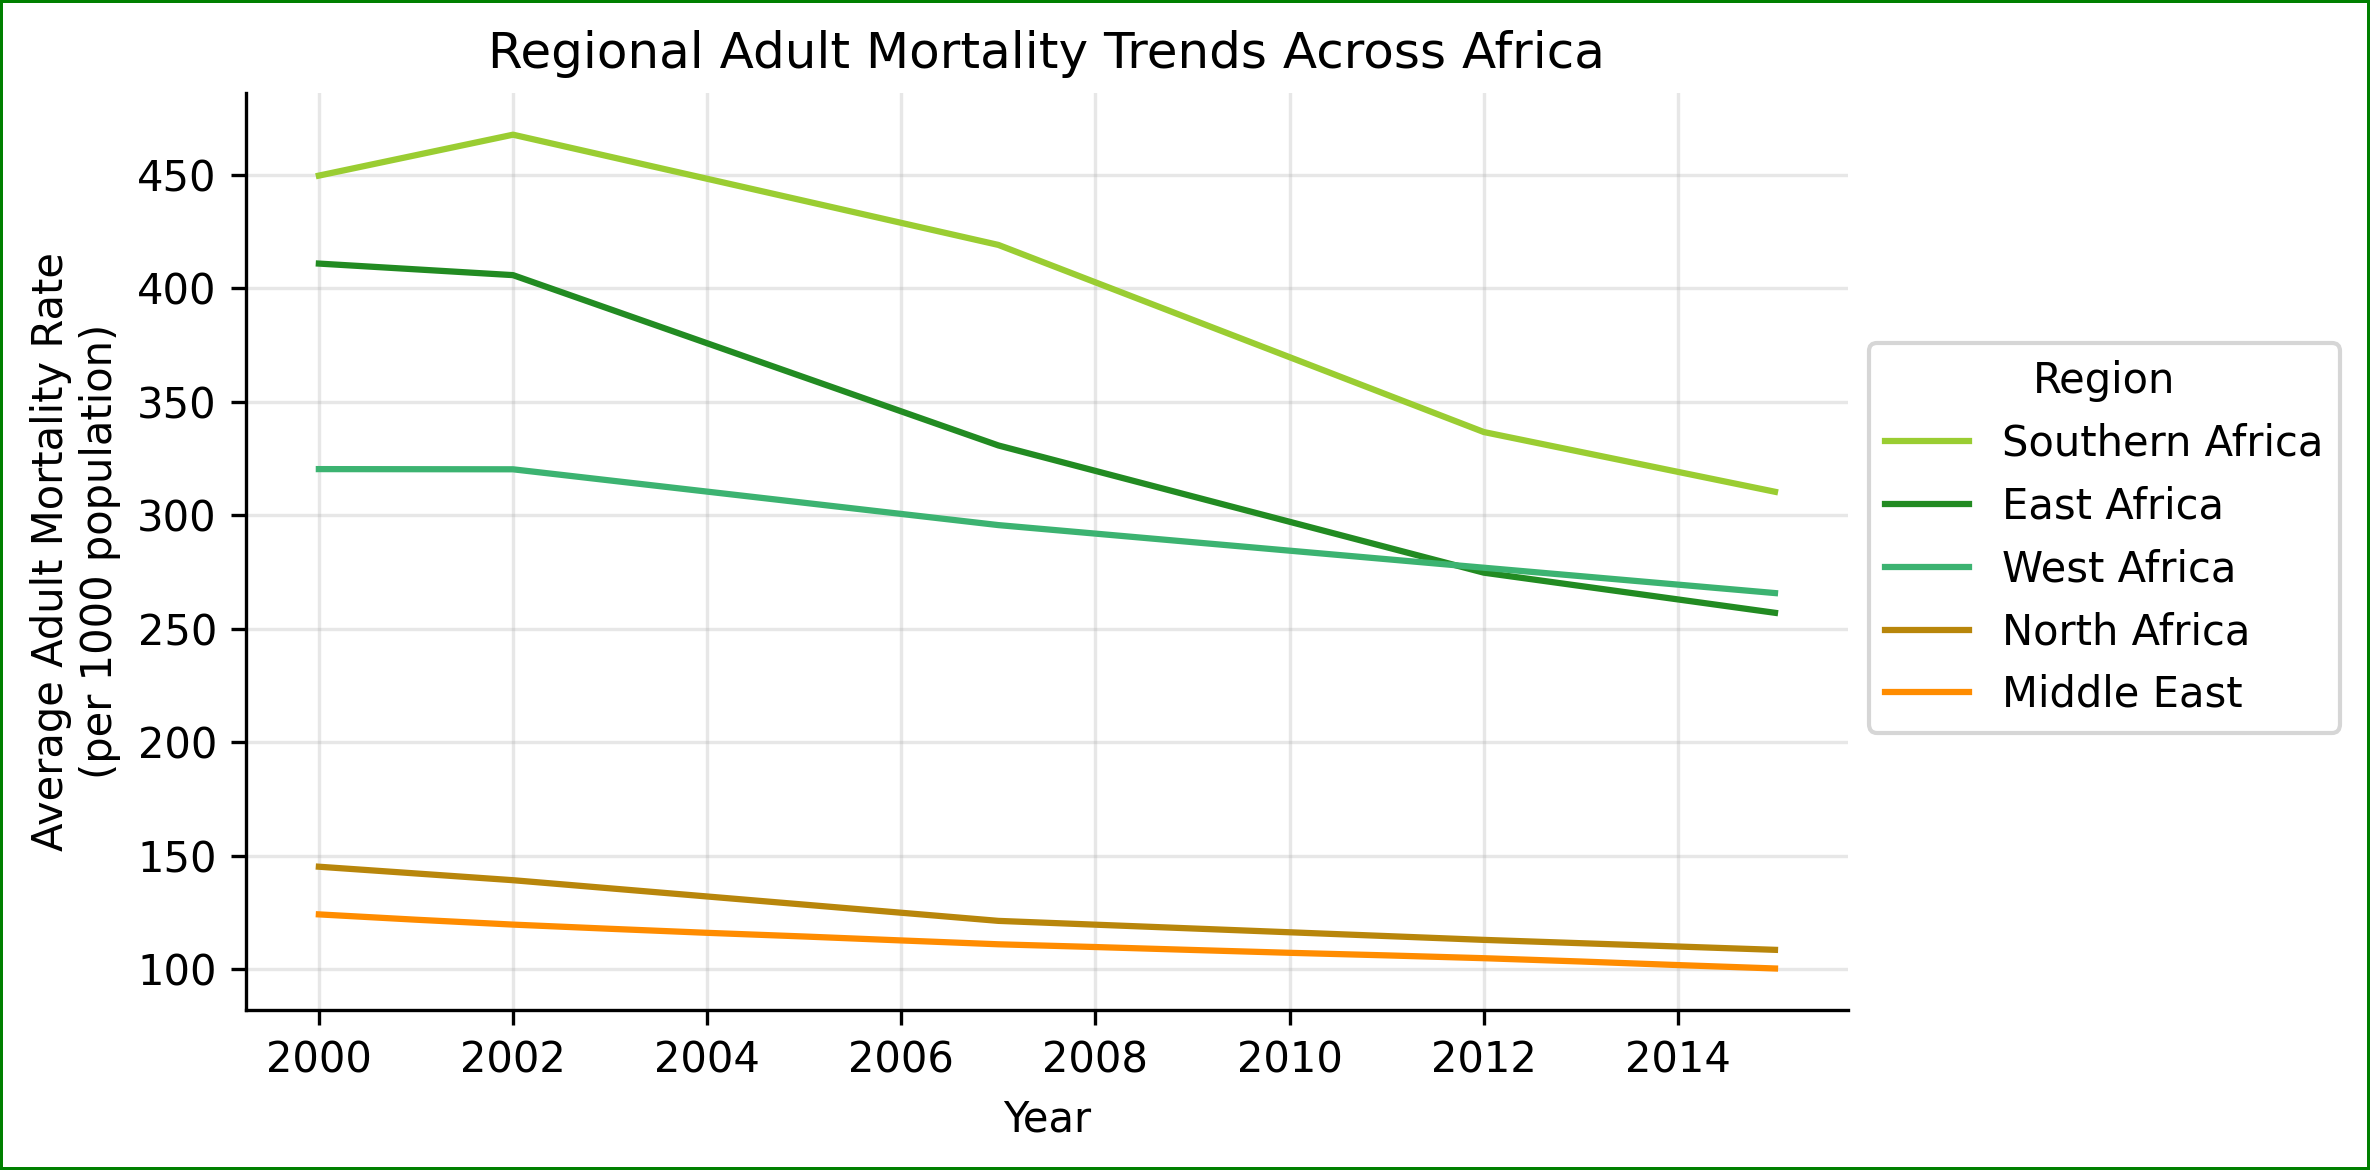

---
---

## <font color="#B0AD89"><strong>7.2 ⫶ </strong></font> Data-ink ratio in Grid

<img src="https://i.imgur.com/zU0fFLp.png" width=1024 /><br><br>
<img src="https://i.imgur.com/workzcL.png" width=1024 /><br><br>
<img src="https://i.imgur.com/0LHJK2P.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Axes Face

<img src="https://i.imgur.com/vfjEIej.png" width=1024 /><br><br>
<img src="https://i.imgur.com/RJG1sFI.png" width=1024 />



In [ ]:
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:
   # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title, facecolor='whitesmoke')
   ax.legend(title="Region", fontsize=9)

   # Grid and style
   ax.grid(True, which='major', color='white', linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', color='white', linestyle='dotted', linewidth=1.2, zorder=1)
   ax.minorticks_on()
   ax.patch.set(edgecolor='grey', linewidth=1)
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print(BAD)

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:

    # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Background and grid
   ax.set_facecolor('lightgrey')
   ax.patch.set(edgecolor='grey', linewidth=1)
   ax.grid(True, which='major', color='white', linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', color='white', linestyle='dotted', linewidth=1.2, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Axes Edge

<img src="https://i.imgur.com/fXoSVUn.png" width=1024 /><br><br>
<img src="https://i.imgur.com/0RVnT6s.png" width=1024 />




In [ ]:
print(BAD)

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:

    # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Background and grid
   ax.set_facecolor('whitesmoke')
   ax.patch.set(edgecolor='green', linewidth=3)
   ax.grid(True, which='major', color='white', linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', color='white', linestyle='dotted', linewidth=0.8, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Grid

<img src="https://i.imgur.com/mXqXgeG.png" width=1024 /><br><br>
<img src="https://i.imgur.com/apPAl8x.png" width=1024 />


In [ ]:
print(BAD)

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:
   # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Grid and style
   ax.grid(True, which='major', linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', linestyle='dotted', linewidth=0.8, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/PvhSPXl.png" width=1024 />

In [ ]:
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:
   # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Grid and style
   ax.grid(True, which='major', alpha=0.3, linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', alpha=0.3, linestyle='dotted', linewidth=0.8, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:
   # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Grid and style
   ax.grid(True, which='major', alpha=0.3, linewidth=1.2, zorder=1)
   ax.grid(True, which='minor', alpha=0.3, linestyle='dotted', linewidth=1.2, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
data_1 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['Southern Africa', 'West Africa', 'East Africa'])]
data_2 = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Region_Africa'].isin(
   ['North Africa', 'Middle East'])]

# Core Plot Elements
for ax, data, title in [(ax1, data_1, "Southern Africa and Middle East"),
                       (ax2, data_2, "North, West, and East Africa")]:
   # Scatter and trend line
   sns.scatterplot(data=data, x='Life_expectancy', y='Adult_mortality',
                   hue='Region_Africa', palette=region_color, s=60, alpha=0.9,
                   edgecolor='white', zorder=3, ax=ax)
   sns.regplot(data=data, x='Life_expectancy', y='Adult_mortality',
               scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

   # Format axes
   ax.set(xlim=(44, 82), ylim=(0, 610),
          xlabel="Life Expectancy (in years)",
          ylabel="Adult Mortality (per 1 million)",
          title=title)
   ax.legend(title="Region", fontsize=9)

   # Grid and style
   ax.grid(True, which='major',  alpha=0.3, linewidth=1.2, zorder=1)
   ax.grid(True, which='minor',  alpha=0.1, linewidth=1.2, zorder=1)
   ax.minorticks_on()
   sns.despine(ax=ax, left=True, bottom=True)

# Add Country Labels
for country in selected_countries:
   for ax, data in [(ax1, data_1), (ax2, data_2)]:
       country_data = data[data['Country'] == country]
       if not country_data.empty:
           ax.annotate(country,
                      xy=(country_data['Life_expectancy'].iloc[0],
                          country_data['Adult_mortality'].iloc[0]),
                      xytext=(10, -2), textcoords='offset points', fontsize=9,
                      bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                               edgecolor='white', alpha=0.7),
                      arrowprops=dict(arrowstyle='-', alpha=0.5))

fig.suptitle("African Life Expectancy vs Adult Mortality (2010)",
            y=0.96, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/xJNJCj5.png" width=1024 />

In [ ]:
print(BAD)

# Setup
fig, ax = plt.subplots(figsize=(5, 3))
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           x='Life_expectancy', y='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, linewidth=1.2, axis='both', zorder=1)
ax.grid(True, which='minor', alpha=0.3, linewidth=0.4, axis='both', zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=13, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="Life Expectancy (years)", ylabel="")

plt.tight_layout()
plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(5, 3))
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           x='Life_expectancy', y='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, linewidth=1.2, axis='x', zorder=1)
ax.grid(True, which='minor', alpha=0.3, linewidth=0.4, axis='x', zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=13, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="Life Expectancy (years)", ylabel="")

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
Adjust this code so it generates the given figure.

In [ ]:
# Data Preparation
life_exp_adult_mort = life_expectancy[['Region_Africa', 'Year', 'Adult_mortality', 'Life_expectancy']].dropna()
regional_averages = life_exp_adult_mort.groupby(['Region_Africa', 'Year']).agg({
   'Adult_mortality': 'mean',
   'Life_expectancy': 'mean'
}).reset_index()

# Setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Core Plot Elements and Formatting
for ax, column, title in [(ax1, 'Adult_mortality', 'Regional Adult Mortality Trends'),
                          (ax2, 'Life_expectancy', 'Regional Life Expectancy Trends')]:
   # Line plot
   sns.lineplot(data=regional_averages, x='Year', y=column,
               hue='Region_Africa', palette=region_color, ax=ax, legend=False)

   # Style settings
   ax.set(title=title)
   ax.set_facecolor('gray')
   ax.patch.set(edgecolor='black', linewidth=3)
   ax.grid(True, which='major', linestyle='dotted', alpha=0.5, zorder=1)
   ax.grid(True, axis='y', which='minor', alpha=0.5, zorder=1)
   ax.minorticks_on()

    # Add region labels
   for region in region_color.keys():
       region_data = regional_averages[regional_averages['Region_Africa'] == region]
       last_year = region_data['Year'].max()
       last_value = region_data[region_data['Year'] == last_year][column].values[0]
       ax.text(last_year + 0.5, last_value, region, color=region_color[region],
               verticalalignment='center', fontsize=7)

# Final adjustments
ax1.set(xlabel='', ylabel='Average Adult Mortality Rate\n(per 1000 population)')
ax2.set(xlabel='Year', ylabel='Average Life Expectancy\n(years)')
sns.despine()
plt.tight_layout()
plt.show()

<font size=2>Expected Output:</font>
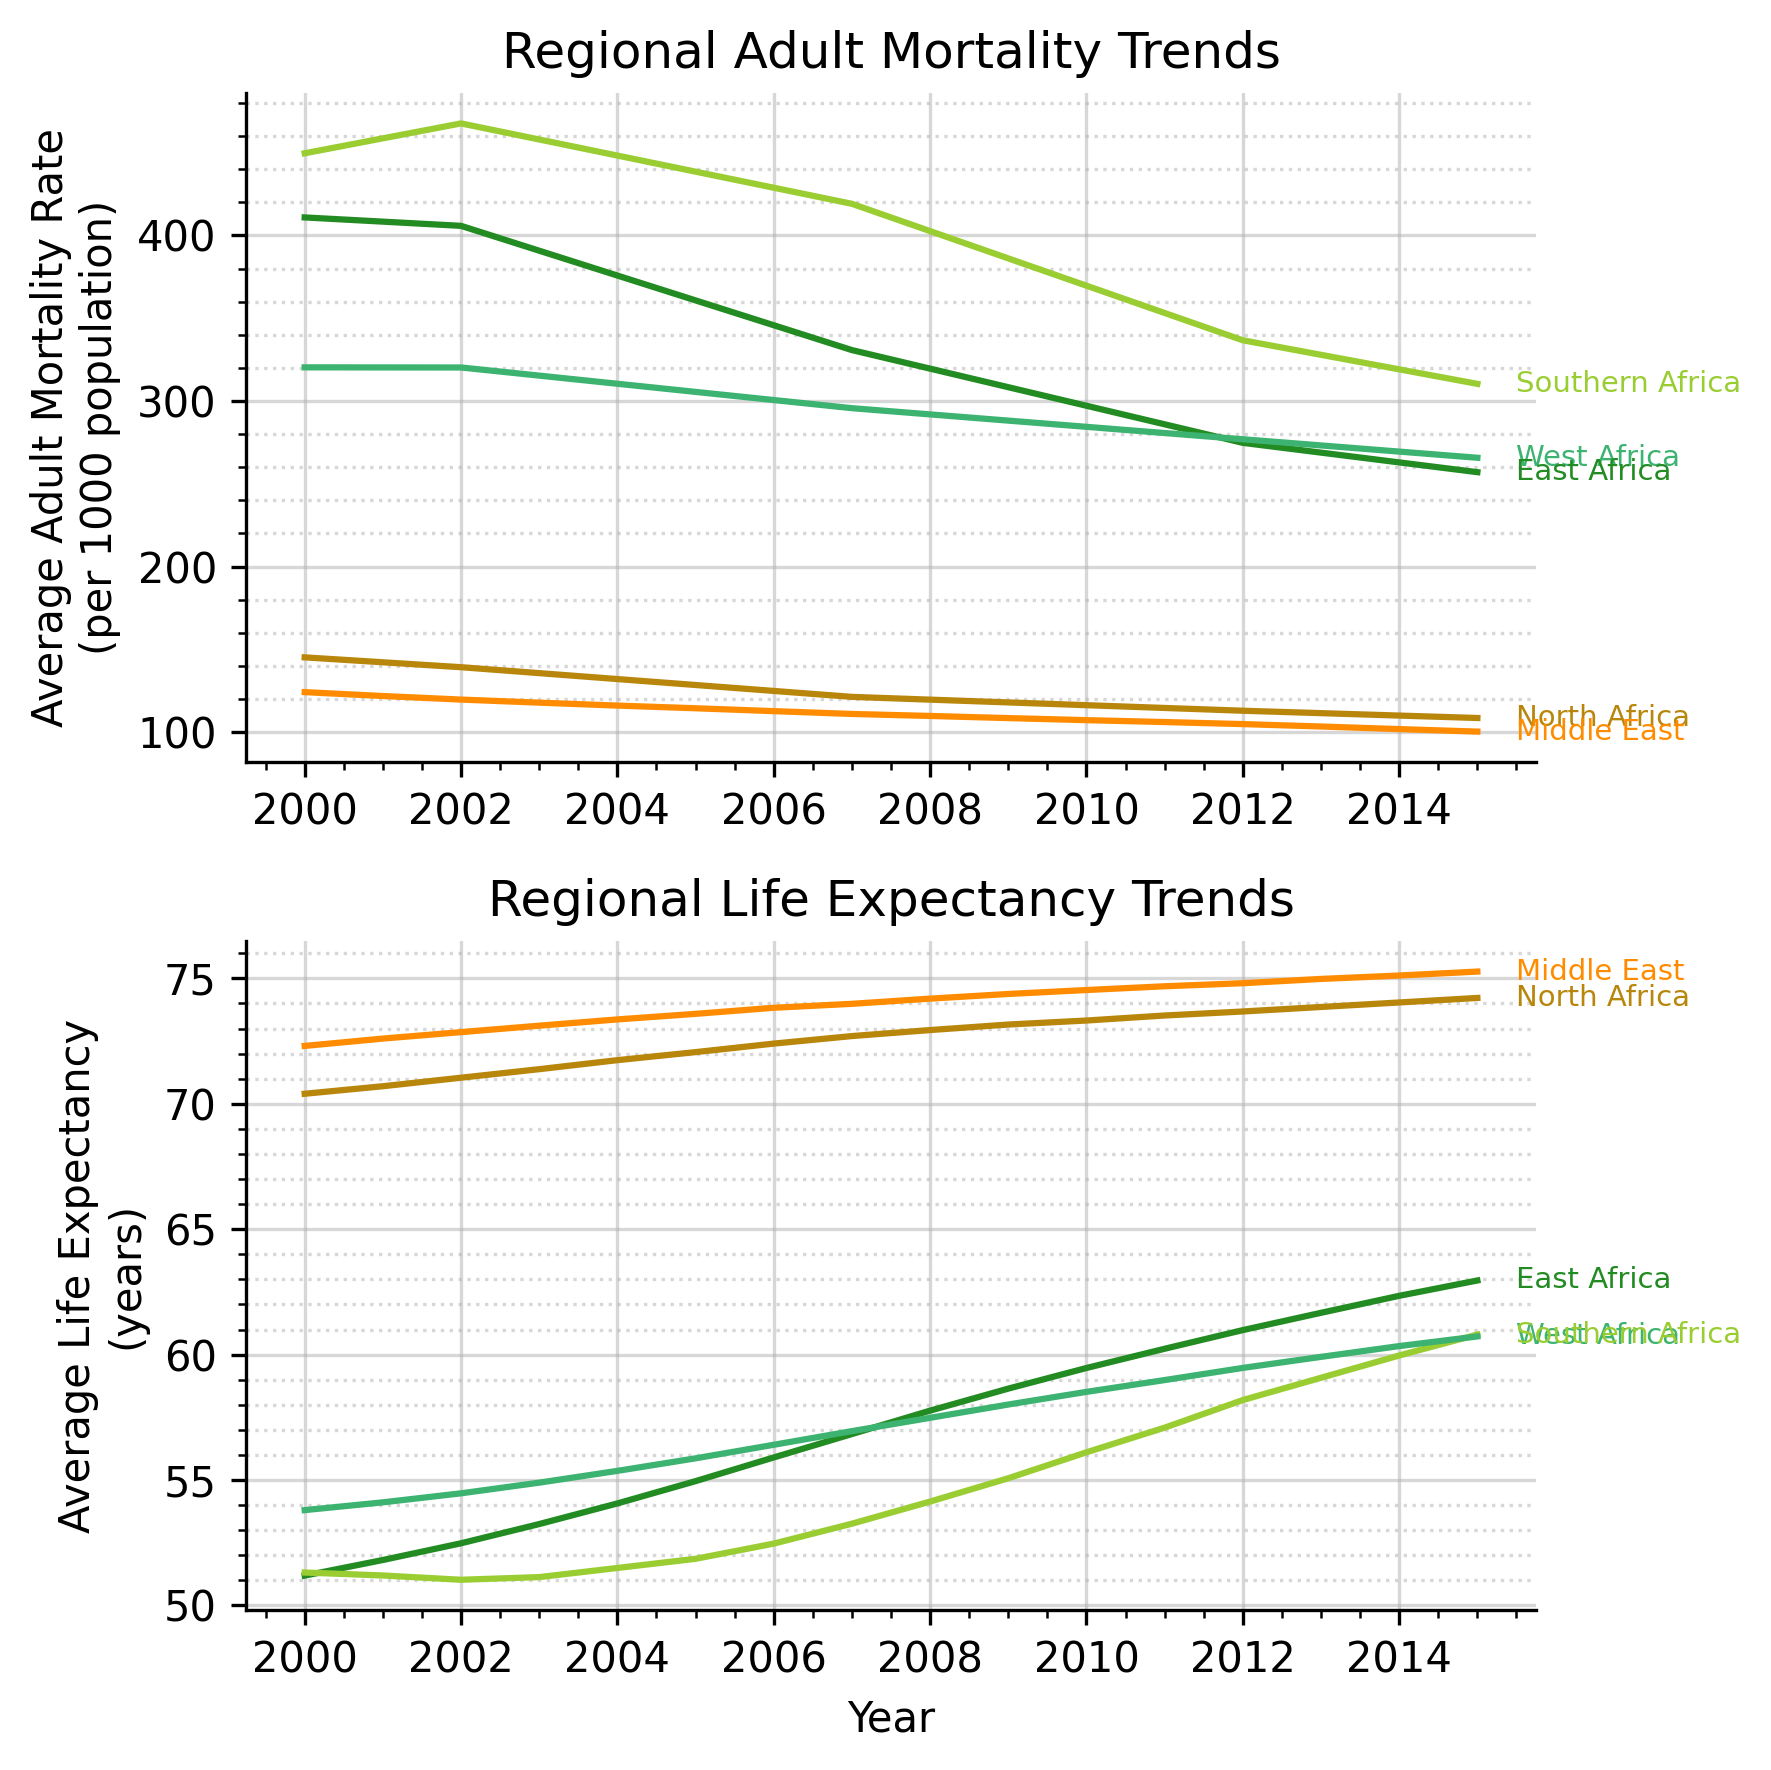

---
---

## <font color="#B0AD89"><strong>7.3 ⫶ </strong></font> Data-ink ratio in Axis

<img src="https://i.imgur.com/MDAYHA3.png" width=1024 /><br><br>
<img src="https://i.imgur.com/yV56UEI.png" width=1024 /><br><br>
<img src="https://i.imgur.com/0GTbt4T.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Axis Label

<img src="https://i.imgur.com/MuyAlVA.png" width=1024 /><br><br>
<img src="https://i.imgur.com/Kh8M4Zm.png" width=1024 />


In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone",
              "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Average life expectancy (in years)\n of each country in 2010",
      ylabel="Deaths of adults\nper 1000 population of the country")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

<img src="https://i.imgur.com/BJSXbAr.png" width=1024 />


In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone",
              "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy",
      ylabel="Adult Mortality")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

<img src="https://i.imgur.com/nlPpaDl.png" width=1024 />


### <font color="#B0AD89"><strong>b ⬝ </strong></font>Tick Label

<img src="https://i.imgur.com/ppixMsz.png" width=1024 /><br><br>

<img src="https://i.imgur.com/liL0SaQ.png" width=1024 />





In [ ]:
print(BAD)

# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=14, labelcolor='black')
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8, labelcolor='grey')
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

<img src="https://i.imgur.com/vT9Tasf.png" width=1024 />





In [ ]:
# Data Preparation
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Setup
fig, ax = plt.subplots(figsize=(5, 4))

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           y='Life_expectancy', x='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, axis='y', linewidth=1.2, zorder=1)
ax.grid(True, which='minor', alpha=0.3, axis='y', linewidth=0.4, zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
ax.tick_params(axis='x', rotation=20)
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(i-0.2, v+3, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=9, fontweight='bold')
ax.set_title("Comparison for Selected Countries\nin Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="", ylabel="Life Expectancy (years)")

plt.tight_layout()
plt.show()

In [ ]:
print(BAD)
# Data Preparation
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Setup
fig, ax = plt.subplots(figsize=(5, 4))

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           y='Life_expectancy', x='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, axis='y', linewidth=1.2, zorder=1)
ax.grid(True, which='minor', alpha=0.3, axis='y', linewidth=0.4, zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
ax.tick_params(axis='x', rotation=0)
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(i-0.2, v+3, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=9, fontweight='bold')
ax.set_title("Comparison for Selected Countries\nin Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="", ylabel="Life Expectancy (years)")

plt.tight_layout()
plt.show()

In [ ]:
print(BAD)
# Data Preparation
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Setup
fig, ax = plt.subplots(figsize=(5, 4))

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           y='Life_expectancy', x='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, axis='y', linewidth=1.2, zorder=1)
ax.grid(True, which='minor', alpha=0.3, axis='y', linewidth=0.4, zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
ax.tick_params(axis='x', rotation=60)
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(i-0.2, v+3, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=9, fontweight='bold')
ax.set_title("Comparison for Selected Countries\nin Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="", ylabel="Life Expectancy (years)")

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/VjBmOFJ.png" width=1024 />





In [ ]:
# Data Preparation
region_means = life_exp_adult_mort_AF.groupby('Region_Africa')['Life_expectancy'].mean()\
   .sort_values(ascending=False)

# Setup
fig, ax = plt.subplots(figsize=(4, 4))
new_labels = {
   'North Africa': 'North\nAfrica',
   'West Africa': 'West\nAfrica',
   'East Africa': 'East\nAfrica',
   'Southern Africa': 'Southern\nAfrica',
   'Middle East': 'Middle\nEast'
}

# Core Plot Element
sns.barplot(data=region_means.reset_index(),
           y='Life_expectancy', x='Region_Africa',
           hue='Region_Africa', palette=region_color,
           alpha=0.9, zorder=3, legend=False, ax=ax)

# Grid and Style
ax.grid(True, which='major', alpha=0.3, axis='y', linewidth=1.2, zorder=1)
ax.grid(True, which='minor', alpha=0.3, axis='y', linewidth=0.4, zorder=1)
ax.minorticks_on()
ax.tick_params(axis='both', length=0, which='both')
ax.tick_params(axis='x', rotation=0)
sns.despine(left=True, bottom=True)

# Value Labels
for i, v in enumerate(region_means):
   ax.text(i-0.2, v+3, f'{v:.1f}', va='center', fontsize=9)

# Text Elements
fig.suptitle("Average Life Expectancy by African Region (2010)",
            y=0.97, fontsize=9, fontweight='bold')
ax.set_title("Comparison for Selected Countries\nin Africa and Middle East in 2010",
            pad=10, fontsize=10)
ax.set(xlabel="", ylabel="Life Expectancy (years)")

# X-axis Labels
labels = [new_labels[label.get_text()] for label in ax.get_xticklabels()]
ax.set_xticks(range(len(region_means)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Ticks

<img src="https://i.imgur.com/r6sbKUV.png" width=1024 /><br><br>

<img src="https://i.imgur.com/KFRyHcf.png" width=1024 />





In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', length=12)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

<img src="https://i.imgur.com/rxFcyce.png" width=1024 />





In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=True, bottom=True)
ax.grid(False)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', length=0, which='both')
ax.set(ylim=(10, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
sns.despine(left=True, bottom=True)
ax.grid(True, alpha=0.4, zorder=1)

plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Spines

<img src="https://i.imgur.com/PvkMoFD.png" width=1024 /><br><br>

<img src="https://i.imgur.com/ZQ3lr7N.png" width=1024 />









In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.set(ylim=(10, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region", fontsize=7)
ax.spines[['top','left','right','bottom']].set_linewidth(2)      # Make spine thicker
ax.grid(True, alpha=0.4, zorder=1)

plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
Adjust this code so it generates the given figure.

In [ ]:
# Data Preparation
life_exp_2000_2015 = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region_Africa'].notna())
][['Region_Africa', 'Year', 'Life_expectancy']].sort_values(by=['Region_Africa'])

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

new_labels = {
   'North Africa': 'North\nAfrica',
   'West Africa': 'West\nAfrica',
   'East Africa': 'East\nAfrica',
   'Southern Africa': 'Southern\nAfrica',
   'Middle East': 'Middle\nEast'
}

# Core Plot Elements and Formatting
for ax, year in [(ax1, 2000), (ax2, 2015)]:
   # Boxplot
   sns.boxplot(data=life_exp_2000_2015[life_exp_2000_2015['Year'] == year],
               x='Region_Africa', y='Life_expectancy',
               hue='Region_Africa', legend=False,
               palette=region_color, ax=ax)

   # Style settings
   ax.set(title=str(year),
          xlabel='',
          ylabel='Life Expectancy (years)',
          ylim=(39, 83))
   ax.tick_params(axis='x', rotation=45)
   ax.tick_params(axis='y', length=10, labelcolor='blue')
   ax.grid(True, alpha=0.4, axis='y')
   ax.set_facecolor('whitesmoke')

# Main title and layout
ax1.set_ylabel('Life Expectancy (years)')
ax2.set_ylabel('Life Expectancy (years)')
sns.despine()
fig.suptitle('Life Expectancy Distribution by Region')
fig.tight_layout()
plt.show()

<font size=2>Expected Output:</font>

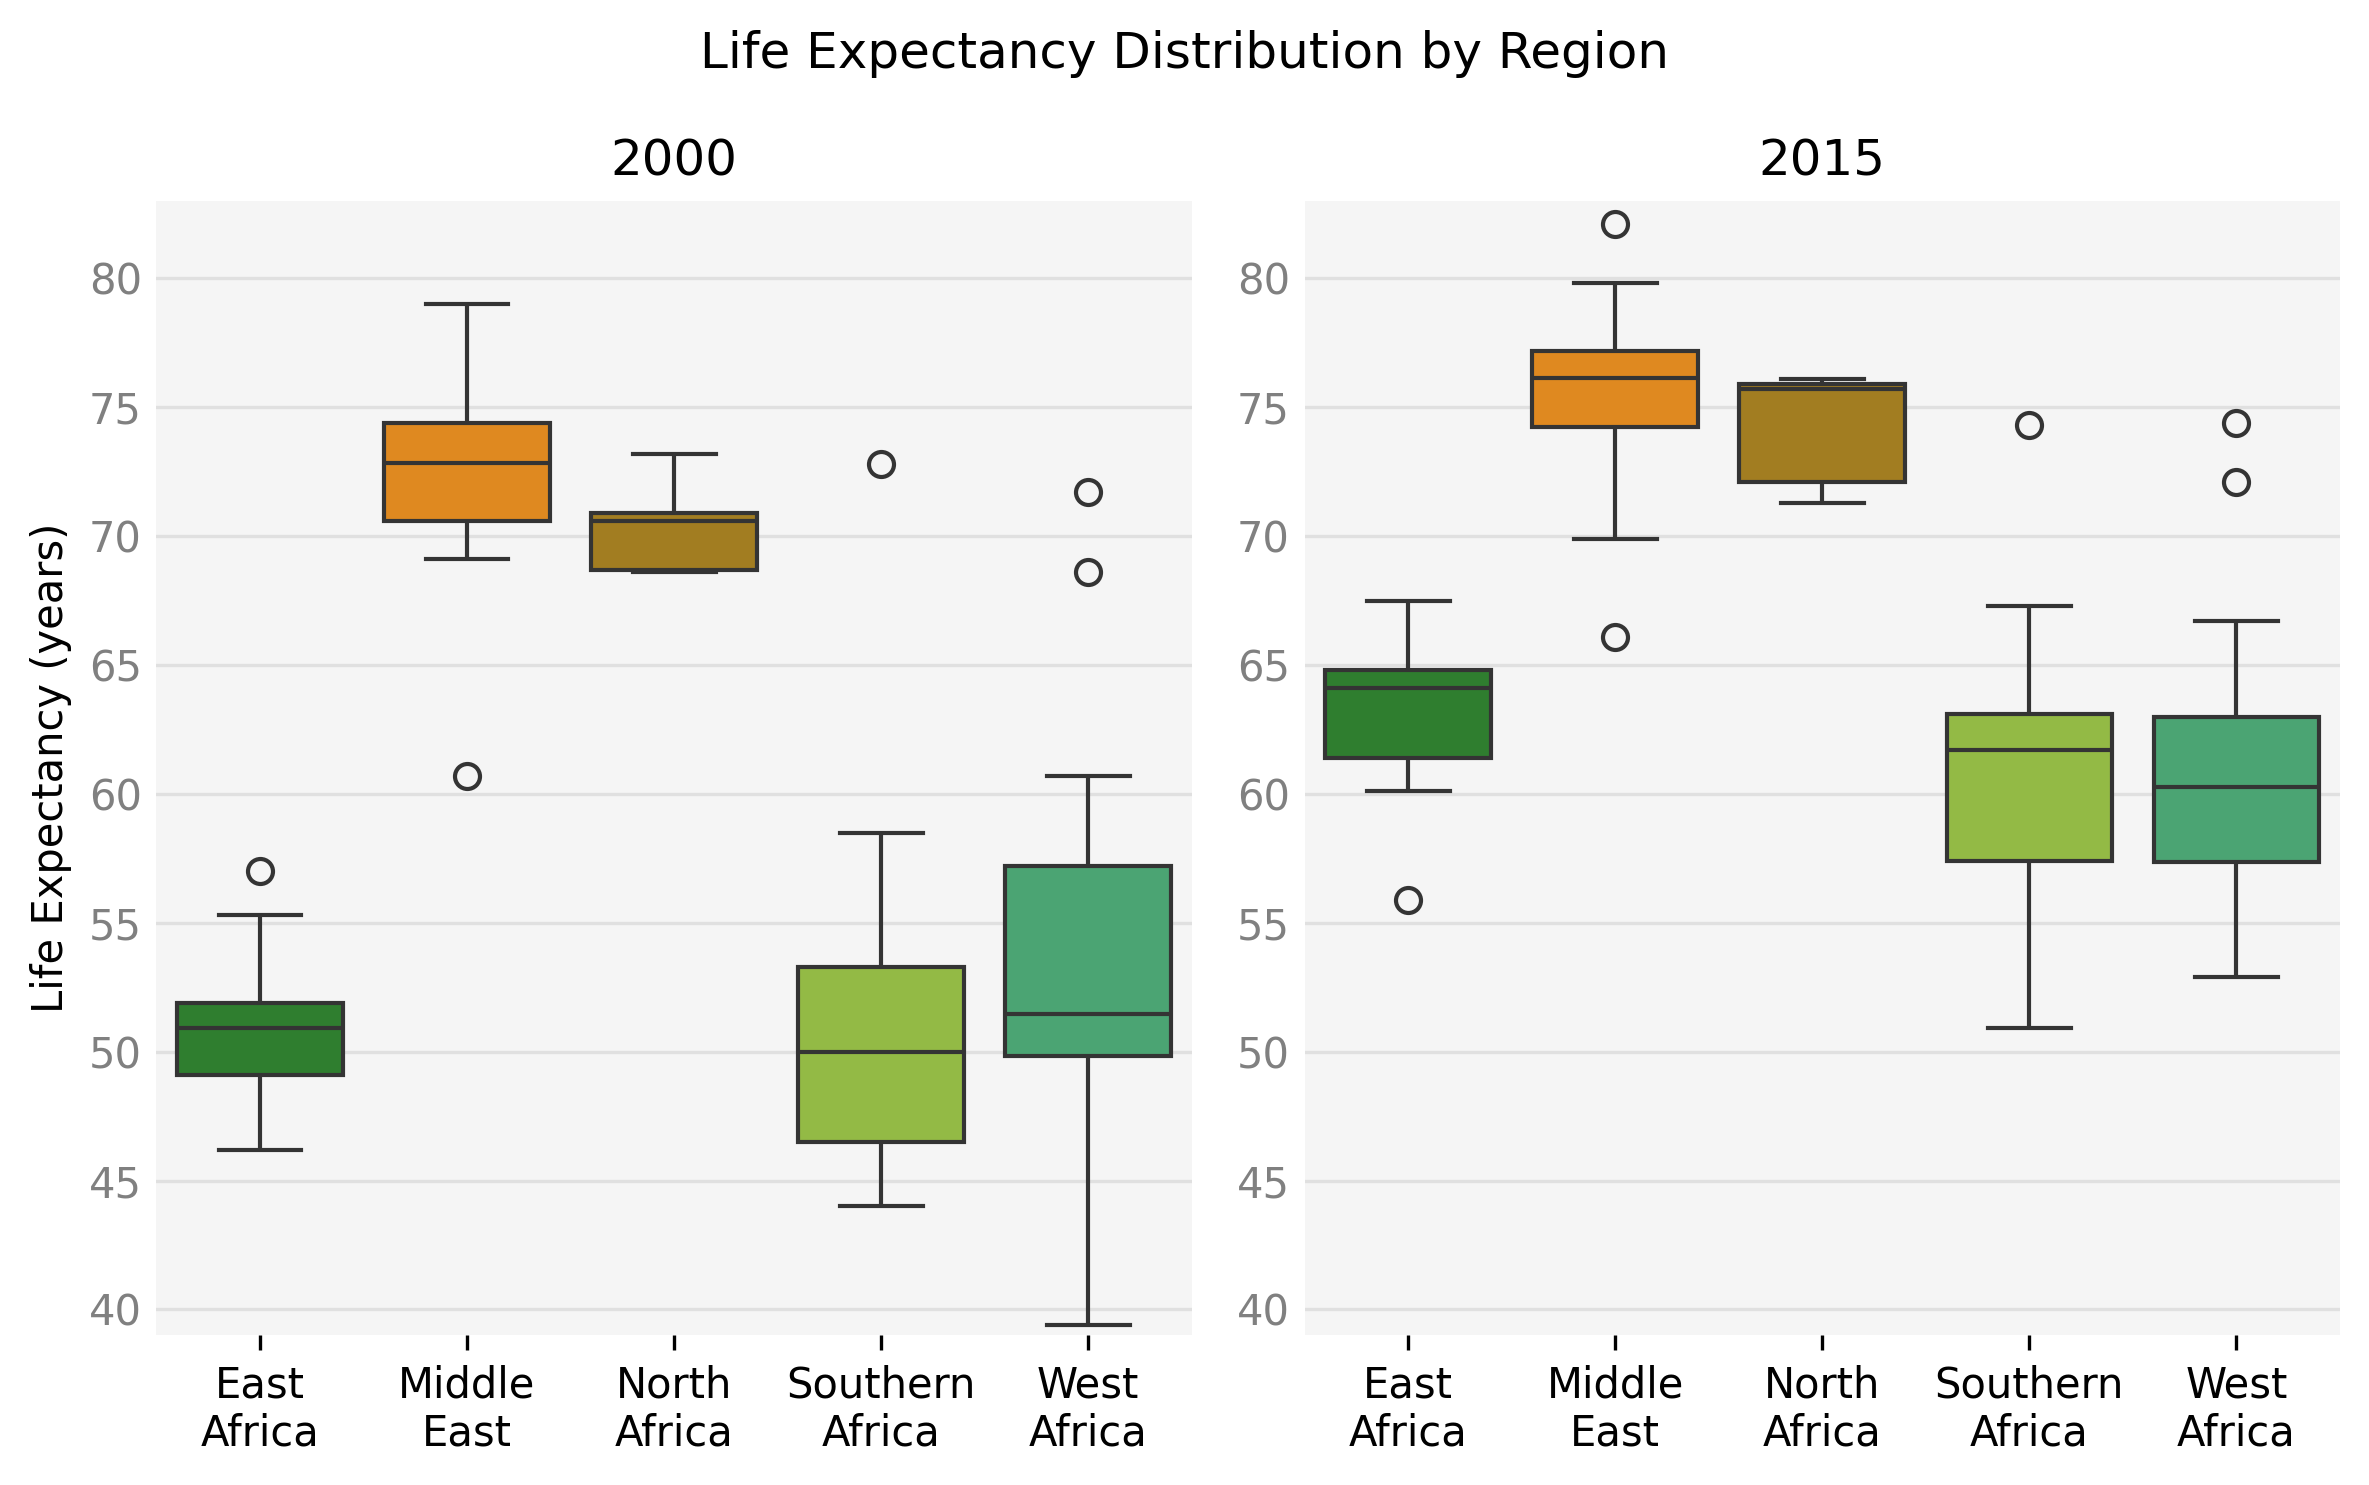

---
---

## <font color="#B0AD89"><strong>7.4 ⫶ </strong></font>Data-ink Ratio in Legend


<img src="https://i.imgur.com/4zPm0Mp.png" width=1024 /><br><br>

<img src="https://i.imgur.com/80Ab5Pg.png" width=1024 /><br><br>

<img src="https://i.imgur.com/Kv4o2Fh.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Legend title

<img src="https://i.imgur.com/qPsQutc.png" width=1024 /><br><br>

<img src="https://i.imgur.com/9fXkr3m.png" width=1024 />

In [ ]:
print(BAD)

# Setup
fig, ax = plt.subplots(figsize=(6, 6))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Different Region\nin Africa and Middle East", fontsize='small')
sns.despine(left=False, bottom=False)
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Legend face & edge

<img src="https://i.imgur.com/HuZKmw5.png" width=1024 />

<img src="https://i.imgur.com/QyPHnui.png" width=1024 />


In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(6, 6))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region",
          facecolor='lightgrey',        # Background color
          edgecolor='black')        # Border color)
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(6, 6))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title="Region",
          facecolor='whitesmoke',        # Background color
          edgecolor='white')        # Border color)
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Legend labels and handles

<img src="https://i.imgur.com/fKcGMs3.png" width=1024 /><br><br>

<img src="https://i.imgur.com/CvBpZ0P.png" width=1024 />



In [ ]:
print(BAD)

# Setup
fig, ax = plt.subplots(figsize=(5, 5))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(
    title='Region',
    # Key (marker/line) properties
    markerfirst=True,          # Put marker before or after text
    markerscale=2,          # Scale size of markers
    handlelength=2.0,         # Length of legend lines
    handleheight=0.7,         # Height of legend lines

    # Key-Text spacing
    handletextpad=0,        # Space between marker and text
    labelspacing=0.25,         # Vertical space between entries
    )
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Legend location and columns

<img src="https://i.imgur.com/YKEMBP1.png" width=1024 /><br><br>

<img src="https://i.imgur.com/HamTA3G.png" width=1024 />




In [ ]:
print(BAD)
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title='Region',
          loc='upper center',            # Anchor point
          ncol=2,                        # Number of columns
          borderaxespad=0,               # Padding between axis and legend
          fontsize=8)                    # Text size
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality",
            fontsize=10, y=1.1, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, y=1.15, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title='',
          bbox_to_anchor=(0.5, 1.15),  # Position (center, below plot)
          loc='upper center',            # Anchor point
          ncol=3,                        # Number of columns
          borderaxespad=0,               # Padding between axis and legend
          fontsize=8)                    # Text size
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

In [ ]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

# Core Plot Elements
sns.scatterplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
               hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
               edgecolor='white', zorder=3, ax=ax)
sns.regplot(data=life_exp_adult_mort_AF, x='Life_expectancy', y='Adult_mortality',
           scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

# Add Country Labels
for country in ["Israel", "Tunisia", "Somalia", "Lesotho", "Sierra Leone", "Yemen, Rep.", "Egypt, Arab Rep."]:
   country_data = life_exp_adult_mort_AF[life_exp_adult_mort_AF['Country'] == country]
   ax.annotate(country,
               xy=(country_data['Life_expectancy'].iloc[0],
                   country_data['Adult_mortality'].iloc[0]),
               xytext=(10, -2), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white',
                        edgecolor='white', alpha=0.7),
               arrowprops=dict(arrowstyle='-', alpha=0.5))

# Text Elements
fig.suptitle("African Life Expectancy vs Adult Mortality", y=0.98,
            fontsize=10, fontweight='bold')
ax.set_title("Comparison for Selected Countries in Africa and Middle East in 2010",
            pad=10, fontsize=8)

# Visual Formatting
ax.tick_params(axis='both', labelsize=8)
ax.set(ylim=(0, 610),
      xlabel="Life Expectancy (in years)",
      ylabel="Adult Mortality (per 1 million)")
ax.legend(title='',
          bbox_to_anchor=(1, 0.5),  # Position (right, next to plot)
          fontsize=8)               # Text size
sns.despine()
ax.grid(True, alpha=0.3, zorder=1)

plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
Adjust this code so it generates the given figure.

In [ ]:
# Setup
fig, axes = plt.subplots(3, 3, figsize=(7, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2009)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10)
    ax.set(xlim=(38, 85),
           ylim=(20, 620),
           xticks=range(40, 85, 10),
           yticks=range(0, 610, 100),
           xlabel='',
           ylabel='')
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('whitesmoke')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality\nby Year (2000-2008)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Region", fontsize=12)

plt.tight_layout()
plt.show()

<font style=2>Expected Output:</font>

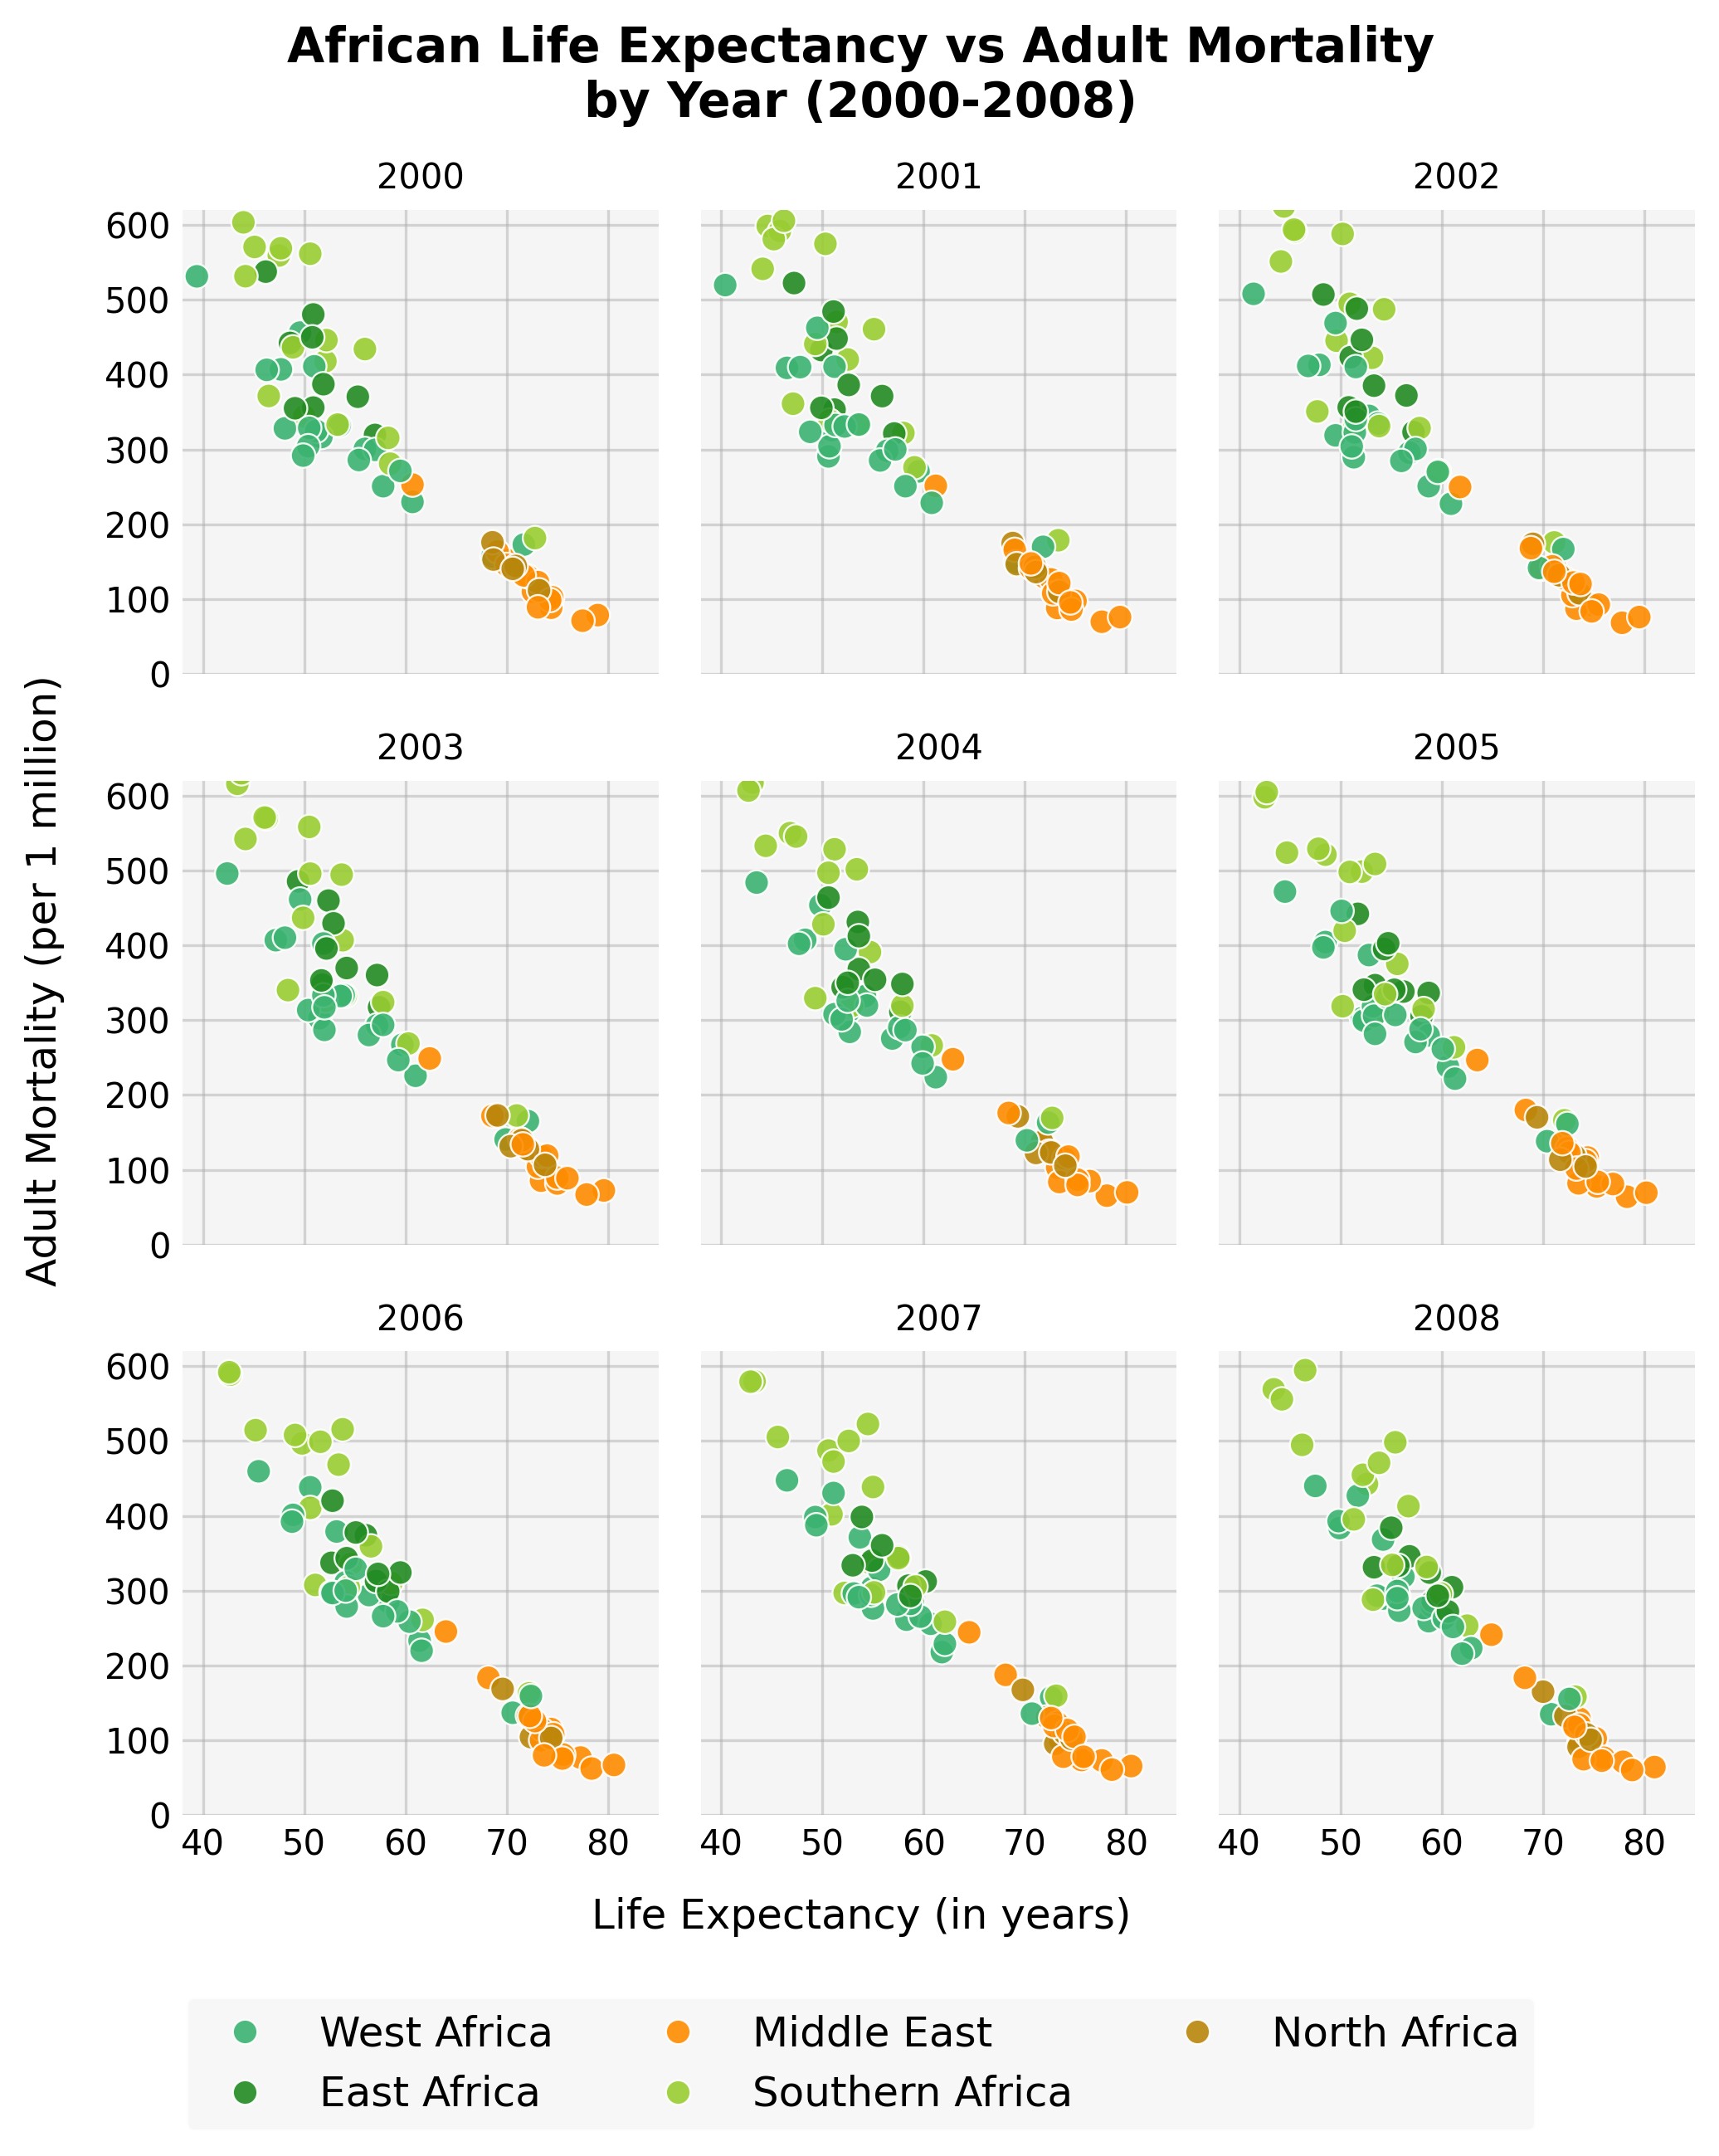

---
---

## <font color="#B0AD89"><strong>7.5 ⫶ </strong></font>Multi-panel figures

<img src="https://i.imgur.com/CgOm2J6.png" width=1024 /><br><br>

<img src="https://i.imgur.com/FZJkmrS.png" width=1024 /><br><br>

<img src="https://i.imgur.com/EWiCK3e.png" width=1024 />






In [ ]:
# Setup
fig, axes = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2016)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    sns.regplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                scatter=False, color='grey',
                line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10, pad=10)
    ax.set_xlim(38, 85)
    ax.set_ylim(20, 620)
    ax.set_xticks(range(40, 85, 10))
    ax.set_yticks(range(0, 610, 100))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('whitesmoke')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality by Year (2000-2015)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=5, fontsize=10)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/nB7gADD.png" width=1024 />






In [ ]:
# Data Preparation
life_exp_filtered = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region'].isin(['Africa', 'Middle East']))
]

# Create FacetGrid and Map Histograms
g = sns.FacetGrid(life_exp_filtered, row='Year', col='Region_Africa',
                 hue='Region_Africa', palette=region_color,
                 margin_titles=True, height=2.5, aspect=0.6)

g.map(plt.hist, 'Life_expectancy', bins=range(40, 86, 5),
     alpha=0.8, edgecolor='white', zorder=2)

# Format Axes
for ax in g.axes.flat:
   ax.set(xticks=range(40, 86, 10),
          xlabel='', ylabel='',
          facecolor='whitesmoke')
   ax.spines[['top', 'right', 'left']].set_visible(False)
   ax.yaxis.grid(True, linestyle='--', alpha=0.5, zorder=1)
   ax.tick_params(axis='y', length=0)

# Add Labels
g.fig.suptitle("Life Expectancy Distribution\nin Africa and the Middle East (2000 vs. 2015)",
              fontsize=14, fontweight='bold')
g.fig.supxlabel("Life Expectancy", y=0.05)
g.fig.supylabel("Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/neF2L7s.png" width=1024 />






### <font color="#B0AD89"><strong>a ⬝ </strong></font>Scale Consistency

<img src="https://i.imgur.com/Rpdf0qs.png" width=1024 />

<img src="https://i.imgur.com/d92GGk1.png" width=1024 />










In [ ]:
print(BAD)

# Setup
fig, axes = plt.subplots(4, 4, figsize=(9, 9)) # Not sharing x and y
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2016)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    sns.regplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                scatter=False, color='grey',
                line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10, pad=10)
    # ax.set_xlim(38, 85)
    # ax.set_ylim(20, 620)
    # ax.set_xticks(range(40, 85, 10))
    # ax.set_yticks(range(0, 610, 100))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('whitesmoke')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality by Year (2000-2015)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=5, fontsize=10)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Layout and Spacing

<img src="https://i.imgur.com/hFifG1c.png" width=1024 />




















In [ ]:
print(BAD)

# Setup
fig, axes = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0) # Delete spacing

axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2016)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    sns.regplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                scatter=False, color='grey',
                line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10, y=0.8, x=0.8, fontweight='bold') # Further arrange
    ax.set_xlim(38, 85)
    ax.set_ylim(20, 620)
    ax.set_xticks(range(40, 85, 10))
    ax.set_yticks(range(0, 610, 100))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('white')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality by Year (2000-2015)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=5, fontsize=10)

#plt.tight_layout() # Not using tight layout
plt.show()

<img src="https://i.imgur.com/gt6xz7R.png" width=1024 />


In [ ]:
# Setup
fig, axes = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2016)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    sns.regplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                scatter=False, color='grey',
                line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10, y=0.8, x=0.8, fontweight='bold') # Further arrange
    ax.set_xlim(38, 85)
    ax.set_ylim(20, 620)
    ax.set_xticks(range(40, 85, 10))
    ax.set_yticks(range(0, 610, 100))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('whitesmoke')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality by Year (2000-2015)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=5, fontsize=10)

plt.tight_layout() # Use tight layout
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Limiting Color & Styling

<img src="https://i.imgur.com/r3mfTQA.png" width=1024 />



In [ ]:
# First, create a copy of the dataframe and modify regions
life_expectancy_mod = life_expectancy.copy()

# Create new region grouping
life_expectancy_mod['Region_Africa'] = life_expectancy_mod['Region_Africa'].apply(
    lambda x: 'North Africa & Middle East' if x in ['North Africa', 'Middle East']
    else 'Rest of Africa'
)

# Update color dictionary for new grouping
region_color_mod = {
    'North Africa & Middle East': 'darkorange',
    'Rest of Africa': 'forestgreen'
}

# Setup
fig, axes = plt.subplots(4, 4, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2016)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy_mod[
        (life_expectancy_mod['Year'] == year) &
        (life_expectancy_mod['Region'].isin(['Africa', 'Middle East']))
    ]

    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color_mod, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    sns.regplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                scatter=False, color='grey',
                line_kws={'alpha': 0.8, 'linewidth': 1}, ax=ax)

    # Format subplot
    ax.set_title(f"{year}", fontsize=10, y=0.8, x=0.8, fontweight='bold') # Further arrange
    ax.set_xlim(38, 85)
    ax.set_ylim(20, 620)
    ax.set_xticks(range(40, 85, 10))
    ax.set_yticks(range(0, 610, 100))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('floralwhite')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality by Year (2000-2015)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=5, fontsize=10)

plt.tight_layout() # Use tight layout
plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Data Density

<img src="https://i.imgur.com/Q9Z3xRB.png" width=1024 />

<img src="https://i.imgur.com/YHnJ32n.png" width=1024 />




In [ ]:
# Data Preparation
life_exp_filtered = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region'].isin(['Africa', 'Middle East']))
].copy()

life_exp_filtered['Region_Africa'] = life_exp_filtered['Region_Africa'].replace({
   'North Africa': 'North Africa &\nMiddle East',
   'Middle East': 'North Africa &\nMiddle East'
})

region_color2 = {
   'North Africa &\nMiddle East': '#DAA520',
   'West Africa': '#3CB371',
   'East Africa': '#228B22',
   'Southern Africa': '#9ACD32'
}

# Create FacetGrid
g = sns.FacetGrid(life_exp_filtered, row='Year', col='Region_Africa',
                 hue='Region_Africa', palette=region_color2,
                 margin_titles=True, height=2.5, aspect=0.8)

# Add Histograms
g.map(plt.hist, 'Life_expectancy', bins=range(40, 86, 5),
     alpha=0.8, edgecolor='white', zorder=2)

# Format Axes
for ax in g.axes.flat:
   ax.set(xticks=range(40, 86, 10),
          yticks=range(0, 14, 2),
          xlabel='', ylabel='',
          facecolor='whitesmoke')
   ax.spines[['top', 'right', 'left']].set_visible(False)
   ax.yaxis.grid(True, linestyle='--', alpha=0.5, zorder=1)
   ax.tick_params(axis='y', length=0)

# Add Labels
g.fig.suptitle("Life Expectancy Distribution\nin Africa and the Middle East (2000 vs. 2015)",
              fontsize=14, fontweight='bold')
g.fig.supxlabel("Life Expectancy", y=0.05)
g.fig.supylabel("Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>e ⬝ </strong></font>Visual Hierarchy

<img src="https://i.imgur.com/LRHtEqb.png" width=1024 />

<img src="https://i.imgur.com/3DiQz8D.png" width=1024 />


In [ ]:
# Data Preparation
life_exp_filtered = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region'].isin(['Africa', 'Middle East']))
].copy()

life_exp_filtered['Region_Africa'] = life_exp_filtered['Region_Africa'].replace({
   'North Africa': 'North Africa &\nMiddle East',
   'Middle East': 'North Africa &\nMiddle East'
})

region_color2 = {
   'North Africa &\nMiddle East': '#DAA520',
   'West Africa': '#3CB371',
   'East Africa': '#228B22',
   'Southern Africa': '#9ACD32'
}

# Create FacetGrid and Map Histograms
g = sns.FacetGrid(life_exp_filtered, row='Year', col='Region_Africa',
                 hue='Region_Africa', palette=region_color2,
                 margin_titles=True, height=3, aspect=0.8)

g.map(plt.hist, 'Life_expectancy', bins=range(40, 86, 5),
     alpha=0.8, edgecolor='white', zorder=2)

# Format Axes
for ax in g.axes.flat:
   ax.set(xticks=range(40, 86, 10),
          yticks=range(0, 14, 2),
          xlabel='Count', ylabel='Life Expectancy',
          facecolor='whitesmoke')
   ax.spines[['top', 'right', 'left']].set_visible(False)
   ax.yaxis.grid(True, linestyle='--', alpha=0.5, zorder=1)
   ax.tick_params(axis='both', labelsize=12, length=0)

# Add Titles
g.fig.suptitle("Life Expectancy Distribution\nin Africa and the Middle East (2000 vs. 2015)",
              fontsize=12)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=12)

plt.tight_layout()
plt.show()

In [ ]:
# Data Preparation
life_exp_filtered = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region'].isin(['Africa', 'Middle East']))
].copy()

life_exp_filtered['Region_Africa'] = life_exp_filtered['Region_Africa'].replace({
   'North Africa': 'North Africa &\nMiddle East',
   'Middle East': 'North Africa &\nMiddle East'
})

region_color3 = {
   'North Africa &\nMiddle East': '#DAA520',
   'West Africa': '#3CB371',
   'East Africa': '#228B22',
   'Southern Africa': '#9ACD32'
}

# Create FacetGrid and Map Histograms
g = sns.FacetGrid(life_exp_filtered, row='Year', col='Region_Africa',
                 hue='Region_Africa', palette=region_color3,
                 margin_titles=True, height=2.5, aspect=0.8)

g.map(plt.hist, 'Life_expectancy', bins=range(40, 86, 5),
     alpha=0.8, edgecolor='white', zorder=2)

# Format Axes
for ax in g.axes.flat:
   ax.set(xticks=range(40, 86, 10),
          yticks=range(0, 14, 2),
          xlabel='', ylabel='',
          facecolor='whitesmoke')
   ax.spines[['top', 'right', 'left']].set_visible(False)
   ax.yaxis.grid(True, linestyle='--', alpha=0.5, zorder=1)
   ax.tick_params(axis='y', labelcolor='grey', length=0)

# Add Labels
g.fig.suptitle("Life Expectancy Distribution\nin Africa and the Middle East (2000 vs. 2015)",
              fontsize=14, fontweight='bold')
g.fig.supxlabel("Life Expectancy", fontsize=13, y=0.05)
g.fig.supylabel("Count", fontsize=13)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=12)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
Adjust this code so it generates the given figure.

In [ ]:
# Filter data for the selected African regions and years
filtered_data = life_expectancy[
    (life_expectancy['Region'].isin(['Africa', 'Middle East'])) &
    (life_expectancy['Year'].isin([2000, 2005, 2010, 2015]))
]

# Create FacetGrid
g = sns.FacetGrid(filtered_data, col='Region_Africa', col_wrap=3,
                  hue='Region_Africa', palette=region_color,
                  height=3, aspect=0.7)

# Map boxplots to each facet
g.map(sns.boxplot, 'Year', 'Life_expectancy', order=[2000, 2005, 2010, 2015])
g.fig.subplots_adjust(wspace=0, hspace=0)

# Format Axes
for ax in g.axes.flat:
   ax.set(xlabel='', ylabel='',
          facecolor='white')
   ax.grid(True, color='black', zorder=1)
   ax.tick_params(axis='y', labelcolor='black', length=0)

# Formatting
g.fig.suptitle("Life Expectancy by African Region\nfor Selected Years (2000, 2005, 2010, 2015)",
               fontsize=16, fontweight='bold', y=1.1)  # Add a suptitle
g.fig.supylabel("Life Expectancy (in years)", fontsize=14, y=0.5)
g.fig.supxlabel("Year", fontsize=14, y=0.02)
g.set_titles(col_template="{col_name}", fontsize=12, pad=10)  # Set titles for each facet

# Adjust layout
plt.show()

<font size=2>Expected Output</font>
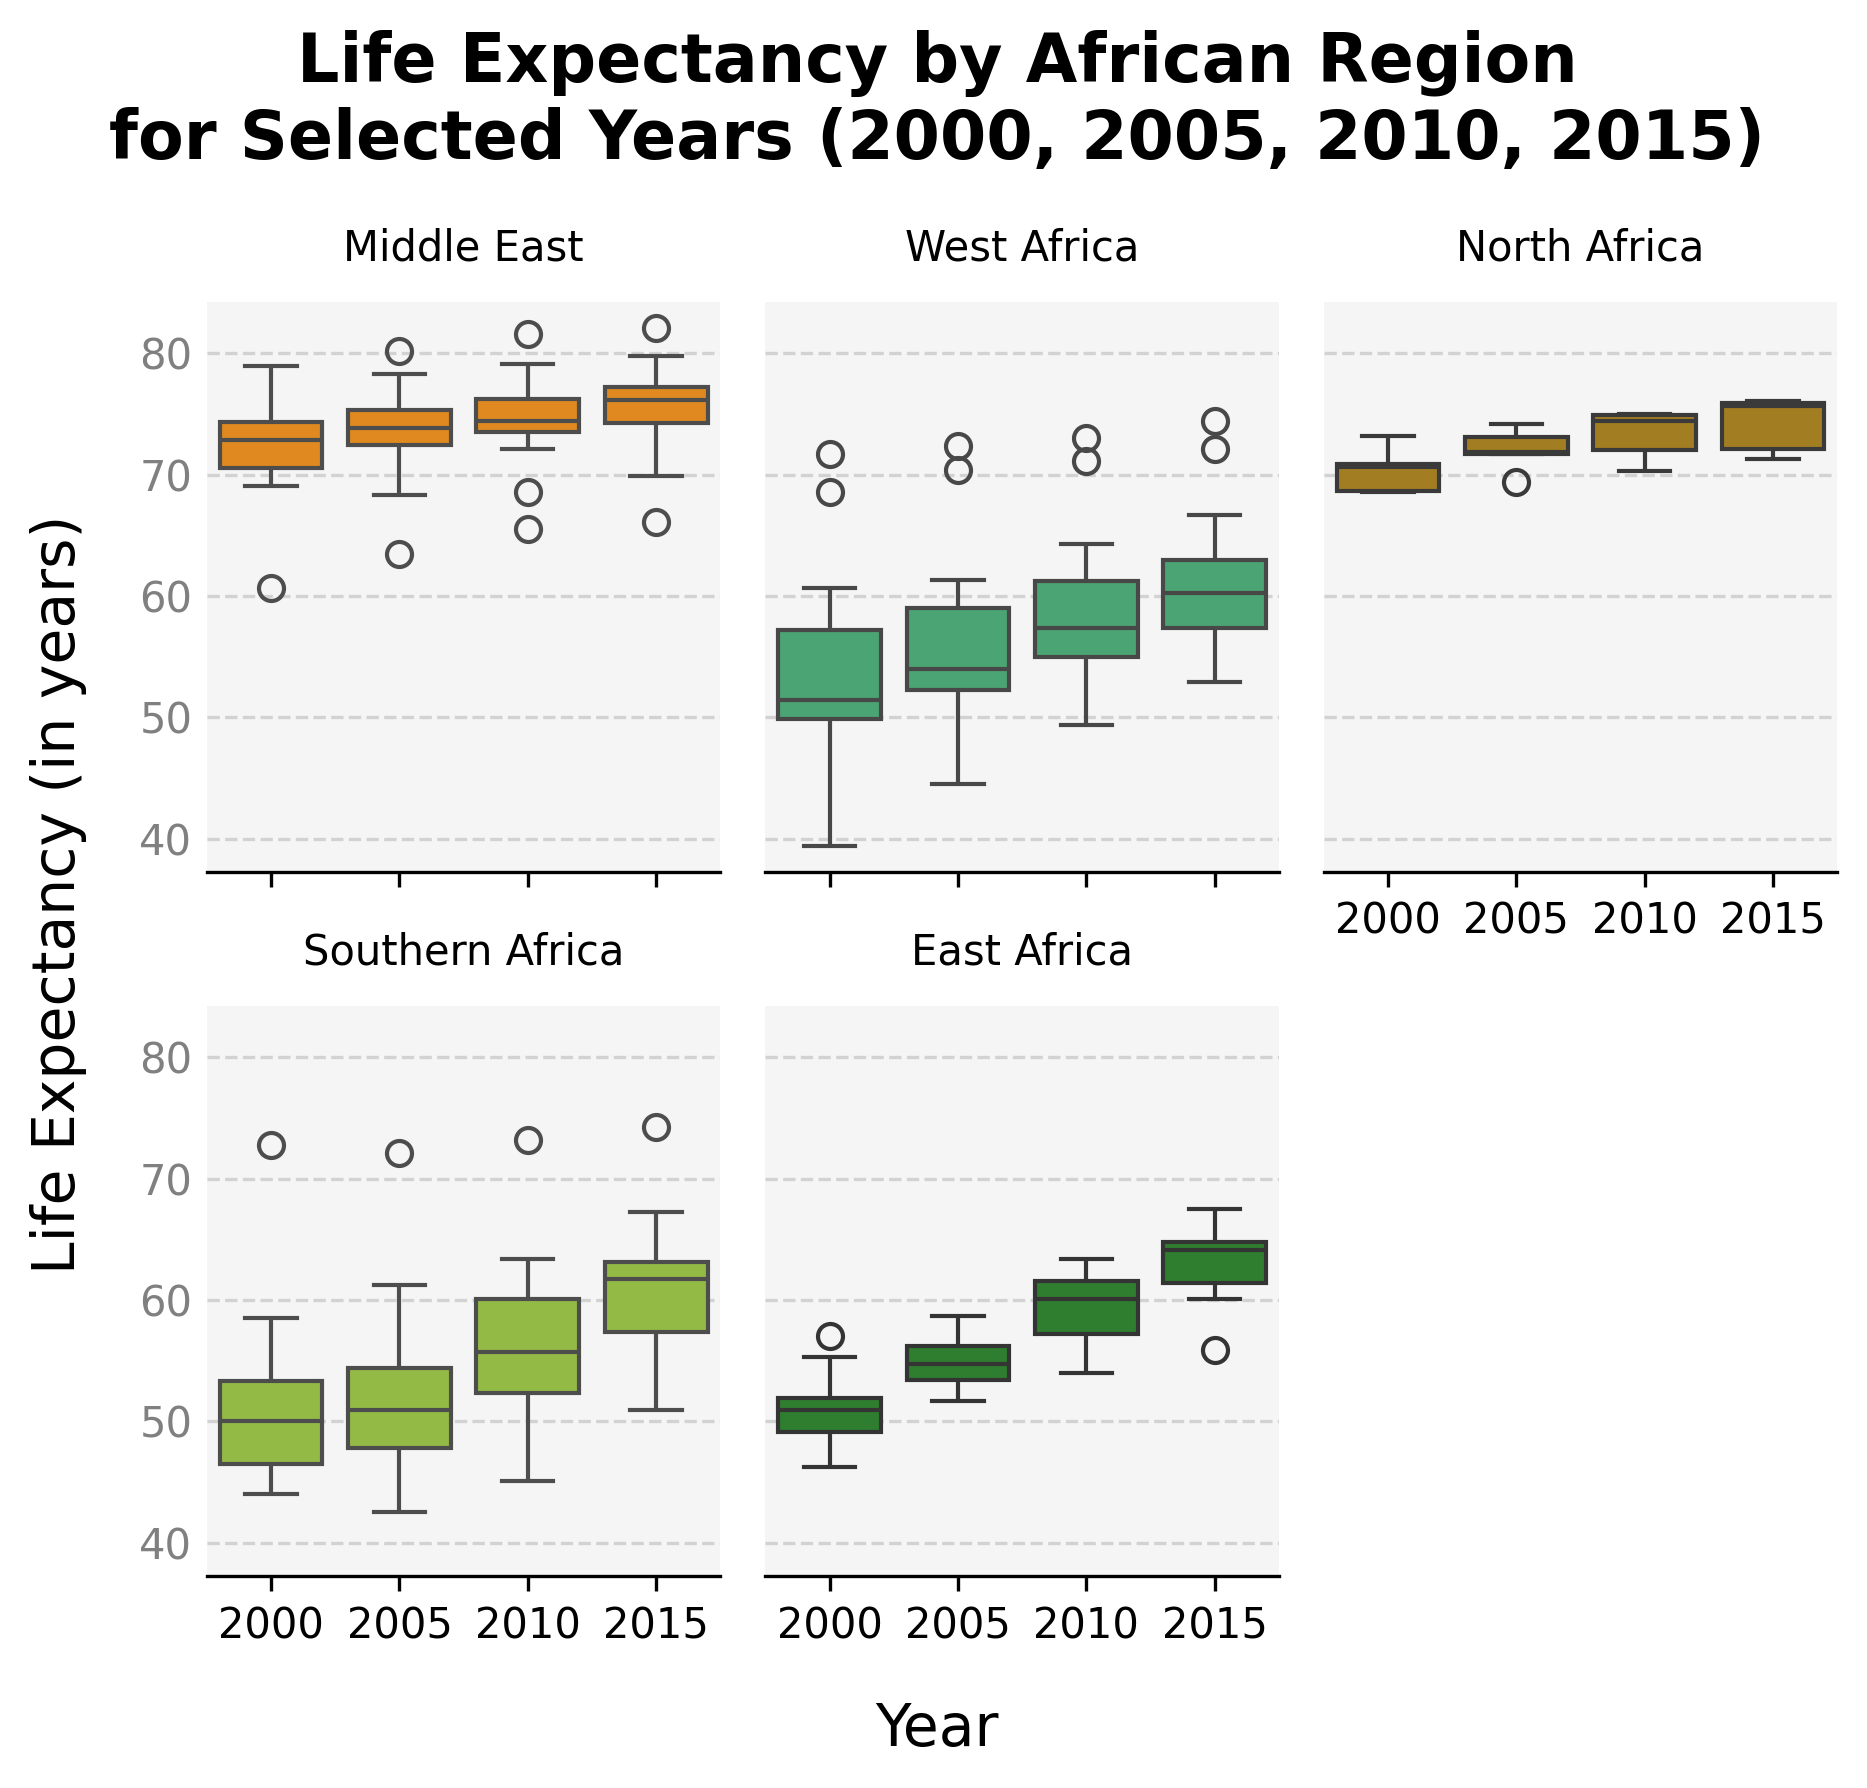

---
---
---

Notes:

```
# Calculate regional averages
adult_mort_AF = life_expectancy[['Region_Africa','Year','Adult_mortality']].dropna()
regional_averages = adult_mort_AF.groupby(['Region_Africa', 'Year'])['Adult_mortality'].mean().sort_values(ascending=False).reset_index()

# Create the plot with fig, ax
fig, ax = plt.subplots(figsize=(8, 4))

# Plot for each region using the predefined colors
sns.lineplot(data=regional_averages, x='Year', y='Adult_mortality',
             hue='Region_Africa', palette=region_color, ax=ax)

# Customize the plot
ax.set_title('Regional Adult Mortality Trends Across Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Average Adult Mortality Rate\n(per 1000 population)')

# Adjust legend
ax.legend(title='Region', bbox_to_anchor=(1, 0.75))

# Add grid and adjust layout
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('green')
ax.grid(True, alpha=0.3)
sns.despine()
fig.tight_layout()
plt.show()
```

```
# Data Preparation
life_exp_adult_mort = life_expectancy[['Region_Africa', 'Year', 'Adult_mortality', 'Life_expectancy']].dropna()
regional_averages = life_exp_adult_mort.groupby(['Region_Africa', 'Year']).agg({
   'Adult_mortality': 'mean',
   'Life_expectancy': 'mean'
}).reset_index()

# Setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Core Plot Elements and Formatting
for ax, column, title in [(ax1, 'Adult_mortality', 'Regional Adult Mortality Trends'),
                          (ax2, 'Life_expectancy', 'Regional Life Expectancy Trends')]:
   # Line plot
   sns.lineplot(data=regional_averages, x='Year', y=column,
               hue='Region_Africa', palette=region_color, ax=ax, legend=False)
     
   # Style settings
   ax.set(title=title)
   #ax.set_facecolor('gray')
   #ax.patch.set(edgecolor='black', linewidth=3)
   ax.grid(True, which='major',  alpha=0.5, zorder=1)
   ax.grid(True, axis='y', which='minor', linestyle='dotted',alpha=0.5, zorder=1)
   ax.minorticks_on()

    # Add region labels
   for region in region_color.keys():
       region_data = regional_averages[regional_averages['Region_Africa'] == region]
       last_year = region_data['Year'].max()
       last_value = region_data[region_data['Year'] == last_year][column].values[0]
       ax.text(last_year + 0.5, last_value, region, color=region_color[region],
               verticalalignment='center', fontsize=7)

# Final adjustments
ax1.set(xlabel='', ylabel='Average Adult Mortality Rate\n(per 1000 population)')
ax2.set(xlabel='Year', ylabel='Average Life Expectancy\n(years)')
sns.despine()
plt.tight_layout()
plt.show()
```

```
# Data Preparation
life_exp_2000_2015 = life_expectancy[
   (life_expectancy['Year'].isin([2000, 2015])) &
   (life_expectancy['Region_Africa'].notna())
][['Region_Africa', 'Year', 'Life_expectancy']].sort_values(by=['Region_Africa'])

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
new_labels = {
   'North Africa': 'North\nAfrica',
   'West Africa': 'West\nAfrica',
   'East Africa': 'East\nAfrica',
   'Southern Africa': 'Southern\nAfrica',
   'Middle East': 'Middle\nEast'
}

# Core Plot Elements and Formatting
for ax, year in [(ax1, 2000), (ax2, 2015)]:
   # Boxplot
   sns.boxplot(data=life_exp_2000_2015[life_exp_2000_2015['Year'] == year],
               x='Region_Africa', y='Life_expectancy',
               hue='Region_Africa', legend=False,
               palette=region_color, ax=ax)
   
   # Style settings
   ax.set(title=str(year),
          xlabel='',
          ylim=(39, 83))
   ax.tick_params(axis='x')
   ax.tick_params(axis='y', length=0, labelcolor='grey')
   ax.grid(True, alpha=0.3, axis='y')
   ax.set_facecolor('whitesmoke')
   ax.set_xticks(range(5))
   ax.set_xticklabels([new_labels[label.get_text()]
                       for label in ax.get_xticklabels()])

# Final adjustments
ax1.set_ylabel('Life Expectancy (years)')
ax2.set_ylabel('')
sns.despine(left=True, bottom=True)
fig.suptitle('Life Expectancy Distribution by Region')
plt.tight_layout()
plt.show()
```

```
# Setup
fig, axes = plt.subplots(3, 3, figsize=(7, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for iteration
years = range(2000, 2009)

# Core Plot Elements
for ax, year in zip(axes, years):
    # Filter data
    year_data = life_expectancy[
        (life_expectancy['Year'] == year) &
        (life_expectancy['Region'].isin(['Africa', 'Middle East']))
    ]
    
    # Create scatter and trend line
    sns.scatterplot(data=year_data, x='Life_expectancy', y='Adult_mortality',
                    hue='Region_Africa', palette=region_color, s=50, alpha=0.9,
                    edgecolor='white', zorder=3, ax=ax)
    
    # Format subplot
    ax.set_title(f"{year}", fontsize=10)
    ax.set(xlim=(38, 85),
           ylim=(20, 620),
           xticks=range(40, 85, 10),
           yticks=range(0, 610, 100),
           xlabel='',
           ylabel='')
    ax.grid(True, alpha=0.5, zorder=1)
    ax.set_facecolor('whitesmoke')
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.get_legend().remove()

# Figure Labels
fig.supylabel("Adult Mortality (per 1 million)", fontsize=12, y=0.5)
fig.supxlabel("Life Expectancy (in years)", fontsize=12, y=0.02)
fig.suptitle("African Life Expectancy vs Adult Mortality\nby Year (2000-2008)",
             fontsize=14, fontweight='bold')

# Add common legend
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, title="Region",
#           loc='upper right', fontsize=12)
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, 0), facecolor='whitesmoke', edgecolor='white',
           loc='upper center', ncol=3, fontsize=12)

plt.tight_layout()
plt.show()
```

```
# Filter data for the selected African regions and years
filtered_data = life_expectancy[
    (life_expectancy['Region'].isin(['Africa', 'Middle East'])) &
    (life_expectancy['Year'].isin([2000, 2005, 2010, 2015]))
]

# Create FacetGrid
g = sns.FacetGrid(filtered_data, col='Region_Africa', col_wrap=3,
                  hue='Region_Africa', palette=region_color,
                  height=3, aspect=0.7)

# Map boxplots to each facet
g.map(sns.boxplot, 'Year', 'Life_expectancy', order=[2000, 2005, 2010, 2015])

# Format Axes
for ax in g.axes.flat:
   ax.set(xlabel='', ylabel='',
          facecolor='whitesmoke')
   ax.spines[['top', 'right', 'left']].set_visible(False)
   ax.yaxis.grid(True, linestyle='--', alpha=0.5, zorder=1)
   ax.tick_params(axis='y', labelcolor='grey', length=0)

# Formatting
g.fig.suptitle("Life Expectancy by African Region\nfor Selected Years (2000, 2005, 2010, 2015)",
               fontsize=16, fontweight='bold')  # Add a suptitle
g.fig.supylabel("Life Expectancy (in years)", fontsize=14, y=0.5)
g.fig.supxlabel("Year", fontsize=14, y=0.02)
g.set_titles("{col_name}", fontsize=12, pad=10)  # Set titles for each facet

# Adjust layout
plt.tight_layout()
plt.show()
```